In [1]:
import numpy as np # linear algebra
import pandas as pd

In [2]:
df = pd.read_csv("/content/df_arabica_clean.csv")

df.head()

,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,...,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,"Piendamo,Cauca",...,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200,Chiayi,...,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,2,2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,NaN,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,...,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
3,3,3,Costa Rica,La Cumbre,CQU2022017,La Montana Tarrazu MIll,NaN,Coffee Quality Union,1900,"Los Santos,Tarrazu",...,87.17,11.8,0,0,green,0,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
4,4,4,Colombia,Finca Santuario,CQU2023002,Finca Santuario,NaN,Coffee Quality Union,1850-2100,"Popayan,Cauca",...,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901


In [3]:
(df.info(), df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             207 non-null    int64  
 1   ID                     207 non-null    int64  
 2   Country of Origin      207 non-null    object 
 3   Farm Name              205 non-null    object 
 4   Lot Number             206 non-null    object 
 5   Mill                   204 non-null    object 
 6   ICO Number             75 non-null     object 
 7   Company                207 non-null    object 
 8   Altitude               206 non-null    object 
 9   Region                 205 non-null    object 
 10  Producer               206 non-null    object 
 11  Number of Bags         207 non-null    int64  
 12  Bag Weight             207 non-null    object 
 13  In-Country Partner     207 non-null    object 
 14  Harvest Year           207 non-null    object 
 15  Gradin

(None, (207, 41))

In [4]:
df['ICO Number'].value_counts()

non              5
11/441/50        2
3093             2
11/35            2
9-392-35         2
                ..
033/0010/022     1
5-0025-0132      1
11/15/95         1
3/37/1370        1
002/1208/1016    1
Name: ICO Number, Length: 67, dtype: int64

In [5]:
df.drop(labels=["Unnamed: 0", "ICO Number", "ID"], axis=1, inplace=True)

In [6]:
from sklearn.impute import SimpleImputer

cat_imputer = SimpleImputer(strategy="most_frequent")
cat_list = df.select_dtypes(include=["object"]).columns.tolist()
df[cat_list] = cat_imputer.fit_transform(df[cat_list])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country of Origin      207 non-null    object 
 1   Farm Name              207 non-null    object 
 2   Lot Number             207 non-null    object 
 3   Mill                   207 non-null    object 
 4   Company                207 non-null    object 
 5   Altitude               207 non-null    object 
 6   Region                 207 non-null    object 
 7   Producer               207 non-null    object 
 8   Number of Bags         207 non-null    int64  
 9   Bag Weight             207 non-null    object 
 10  In-Country Partner     207 non-null    object 
 11  Harvest Year           207 non-null    object 
 12  Grading Date           207 non-null    object 
 13  Owner                  207 non-null    object 
 14  Variety                207 non-null    object 
 15  Status

In [8]:
df['Altitude'].value_counts()

1200           24
1600           12
1300            7
1250            7
1400            7
               ..
1411            1
4895 A 5650     1
400-600         1
200-400         1
850-1100        1
Name: Altitude, Length: 97, dtype: int64

In [9]:
df['Bag Weight'].value_counts()

30 kg       39
60 kg       31
69 kg       25
1 kg        14
15 kg       10
5 kg        10
2 kg         8
70 kg        6
100 kg       6
50 kg        6
10 kg        5
80 kg        4
35 kg        4
20 kg        3
12 kg        3
4 kg         2
25 kg        2
90 kg        2
45 kg        2
16 kg        2
13 kg        2
22 kg        2
19200 kg     2
8 kg         2
40 kg        1
32 kg        1
200 kg       1
3 kg         1
320 kg       1
6 kg         1
104 kg       1
110 kg       1
300 kg       1
36 kg        1
24 kg        1
48 kg        1
85 kg        1
27 kg        1
59 kg        1
Name: Bag Weight, dtype: int64

In [10]:
df['Harvest Year'].value_counts()

2021 / 2022    99
2022           48
2022 / 2023    42
2021           13
2023            3
2017 / 2018     1
2018 / 2019     1
Name: Harvest Year, dtype: int64

In [11]:
df['Status'].value_counts() 

Completed    207
Name: Status, dtype: int64

In [12]:
df["Grading Date"].value_counts()

November 15th, 2022     40
January 6th, 2023       26
December 12th, 2022      8
July 14th, 2022          7
December 30th, 2022      7
                        ..
February 22nd, 2023      1
April 5th, 2023          1
September 26th, 2022     1
January 18th, 2023       1
November 11th, 2022      1
Name: Grading Date, Length: 75, dtype: int64

In [13]:
df["Expiration"].value_counts()

November 15th, 2023     40
January 6th, 2024       26
December 12th, 2023      8
July 14th, 2023          7
December 30th, 2023      7
                        ..
February 22nd, 2024      1
April 4th, 2024          1
September 26th, 2023     1
January 18th, 2024       1
November 11th, 2023      1
Name: Expiration, Length: 75, dtype: int64

In [14]:
df['Processing Method'].value_counts()

Washed / Wet                            129
Natural / Dry                            46
Pulped natural / honey                   25
Double Anaerobic Washed                   1
Semi Washed                               1
Honey,Mossto                              1
Double Carbonic Maceration / Natural      1
Wet Hulling                               1
Anaerobico 1000h                          1
SEMI-LAVADO                               1
Name: Processing Method, dtype: int64

In [15]:
tmp = df['Region'].value_counts()[:10]
tmp.index, tmp.values

(Index(['Chiayi', '新竹縣', '苗栗縣', 'North of Thailand', 'Yunlin', '桃園市',
        '壽豐鄉Shoufeng Township', 'Marcala', 'Quindio', 'Sul de Minas'],
       dtype='object'),
 array([14, 11,  7,  7,  7,  4,  3,  3,  3,  3]))

In [16]:
df.drop(
    labels=[
        "Certification Contact", 
        "Certification Address",
        "Lot Number", 
        "Altitude", 
        "Mill", 
        "Status",
        "Aroma",
        "Flavor",
        "Aftertaste",
        "Acidity",
        "Body",
        "Balance", 
        "Uniformity",
        "Clean Cup",
        "Sweetness",
        "Overall"
    ],
    axis=1, 
        inplace=True
)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country of Origin     207 non-null    object 
 1   Farm Name             207 non-null    object 
 2   Company               207 non-null    object 
 3   Region                207 non-null    object 
 4   Producer              207 non-null    object 
 5   Number of Bags        207 non-null    int64  
 6   Bag Weight            207 non-null    object 
 7   In-Country Partner    207 non-null    object 
 8   Harvest Year          207 non-null    object 
 9   Grading Date          207 non-null    object 
 10  Owner                 207 non-null    object 
 11  Variety               207 non-null    object 
 12  Processing Method     207 non-null    object 
 13  Defects               207 non-null    float64
 14  Total Cup Points      207 non-null    float64
 15  Moisture Percentage   2

In [17]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [18]:
cat_list = df.select_dtypes(include=["object"]).columns.tolist()
num_list = df.select_dtypes(exclude=["object"]).columns.tolist()

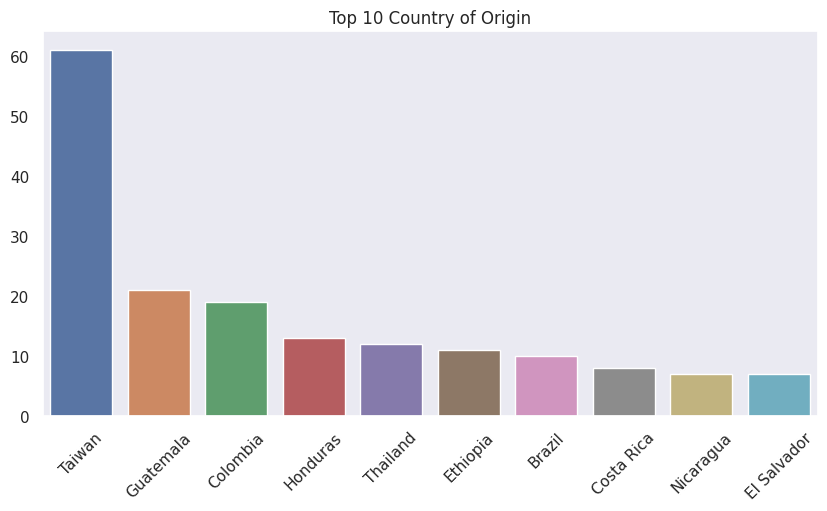

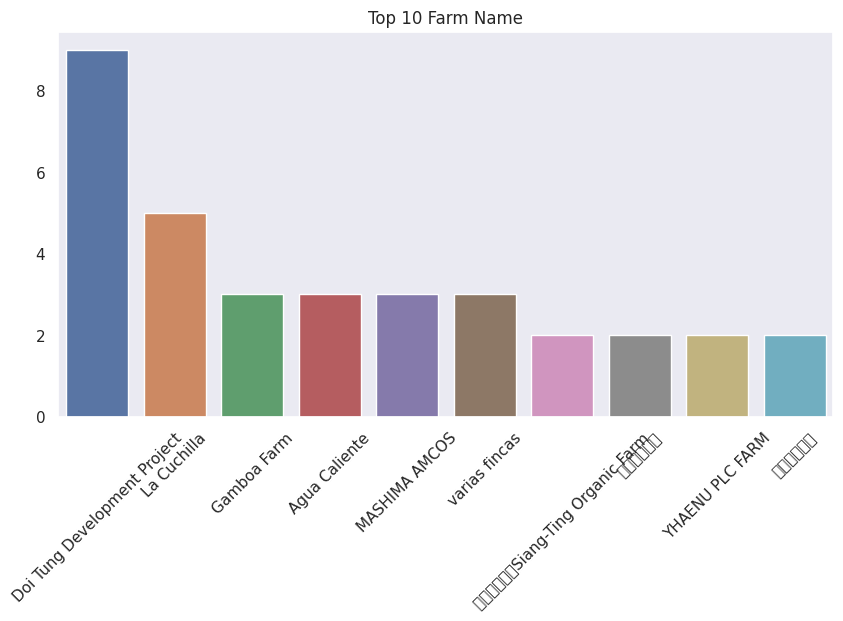

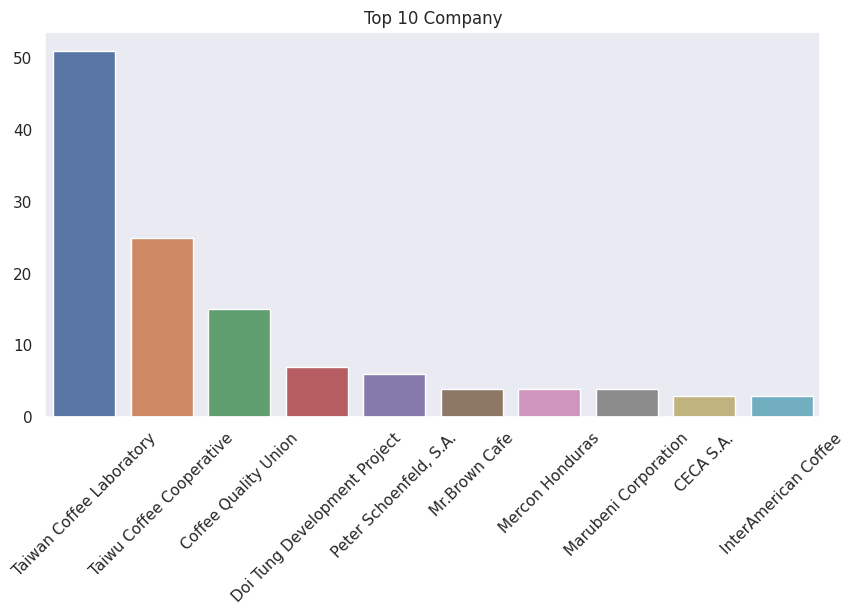

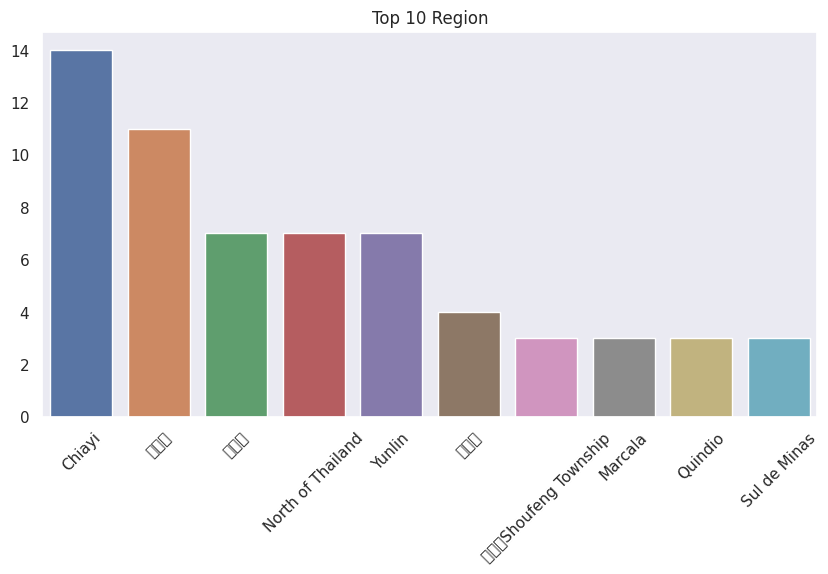

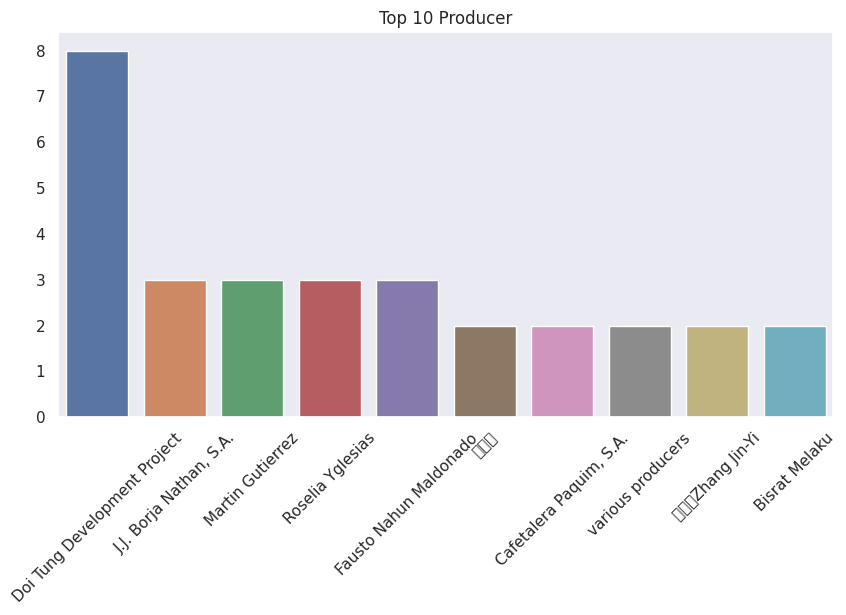

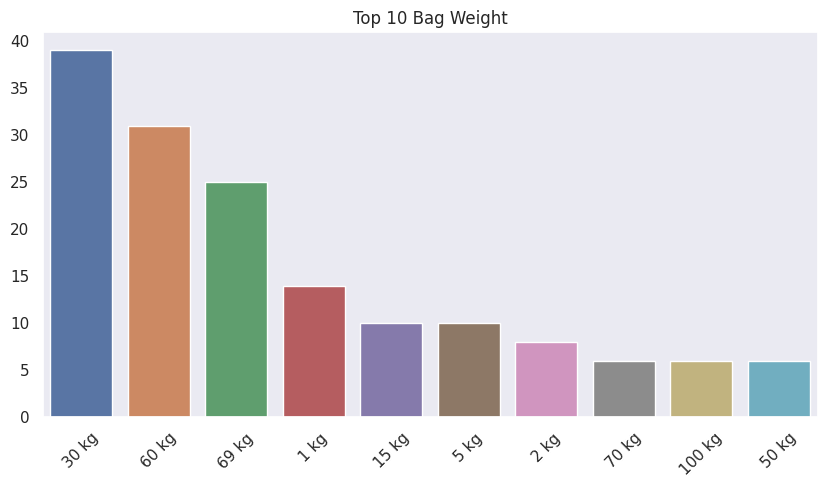

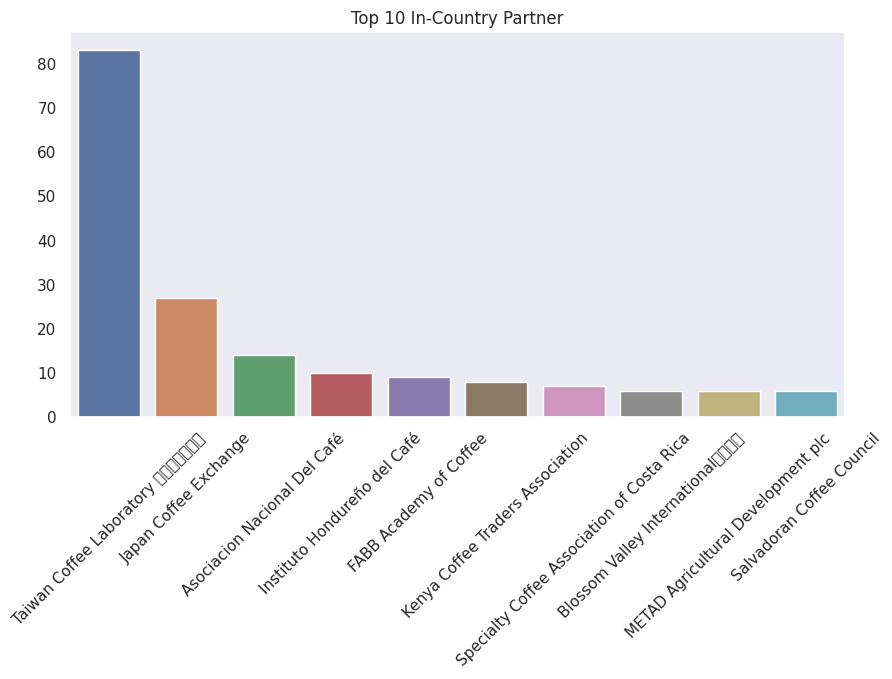

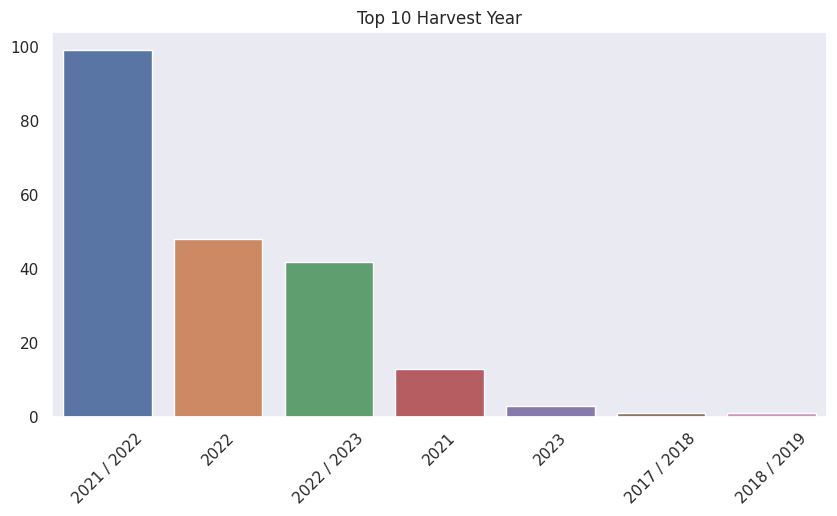

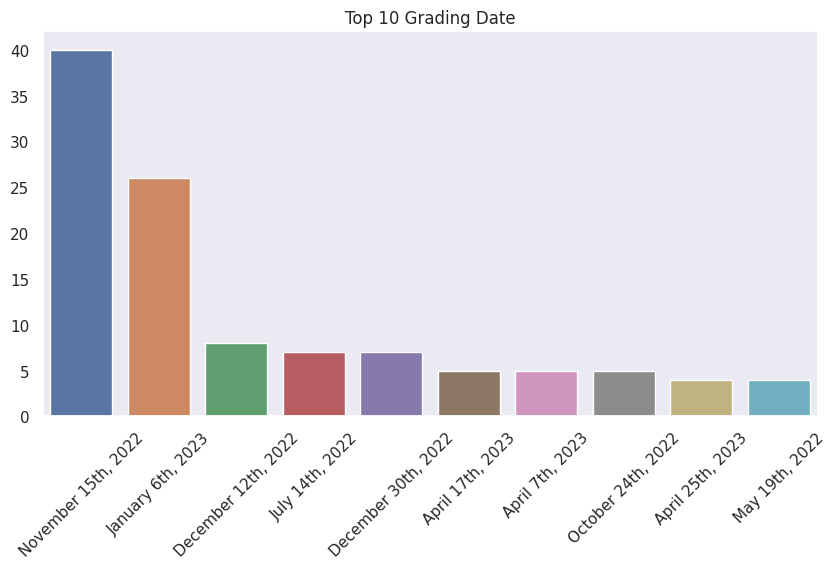

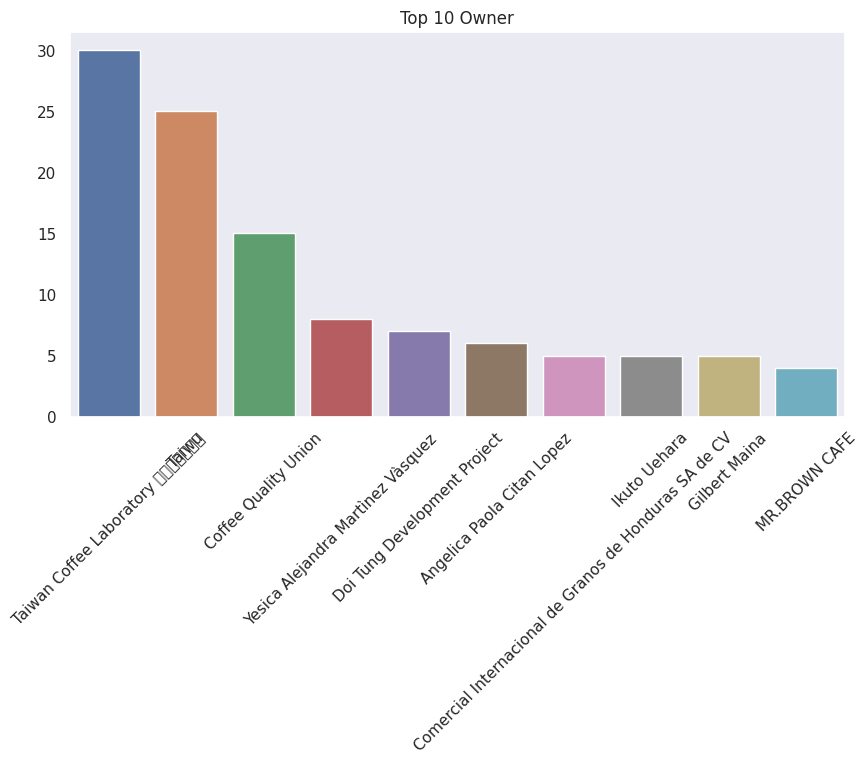

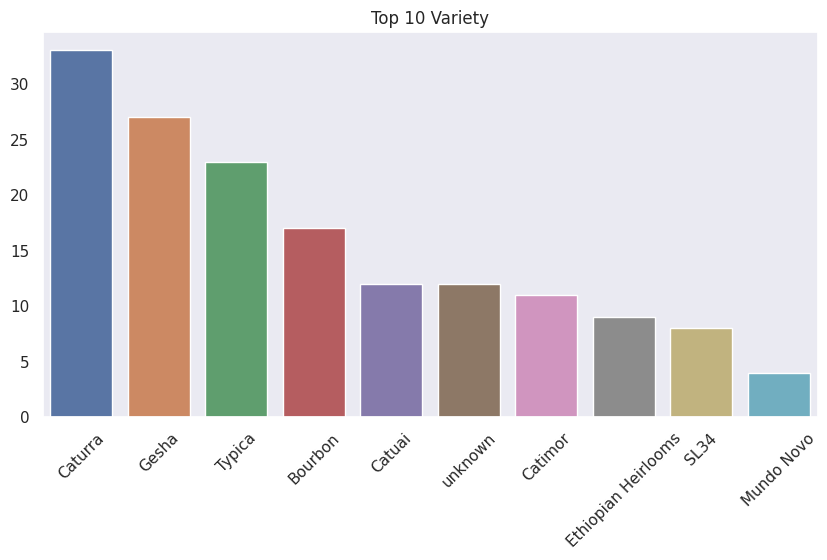

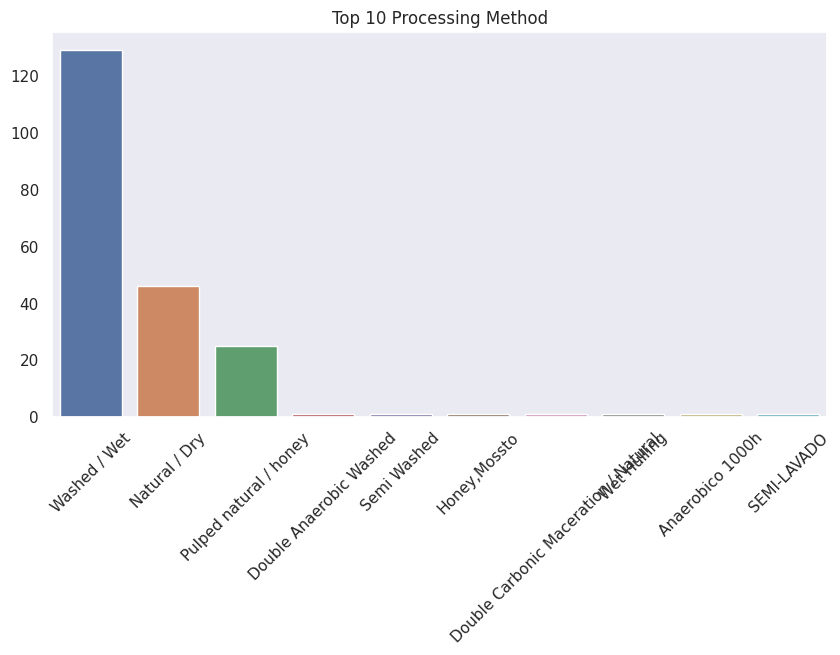

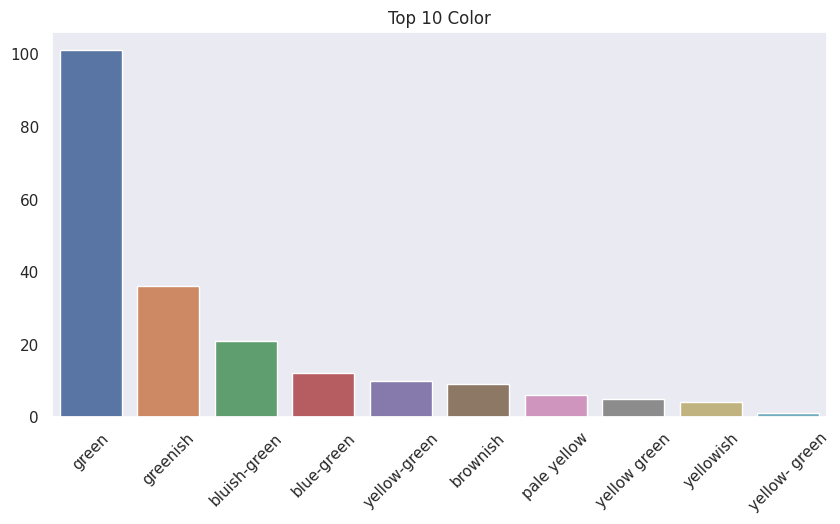

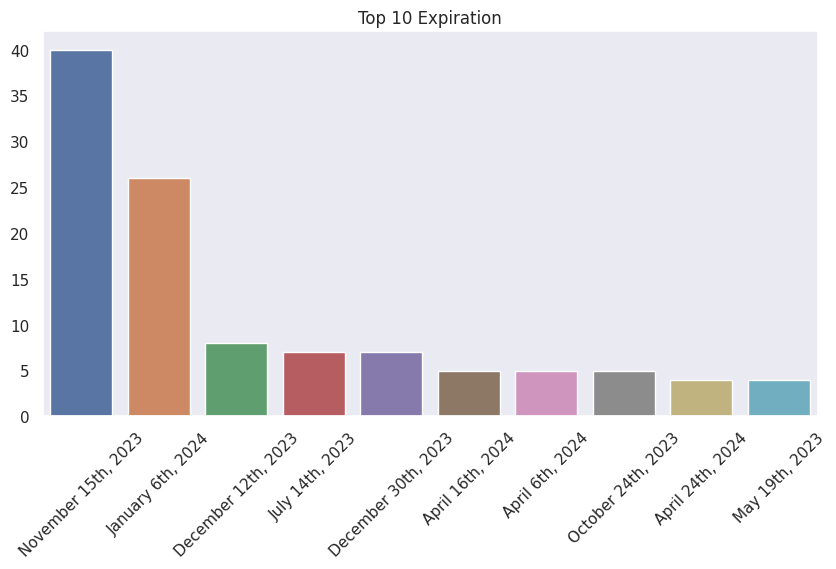

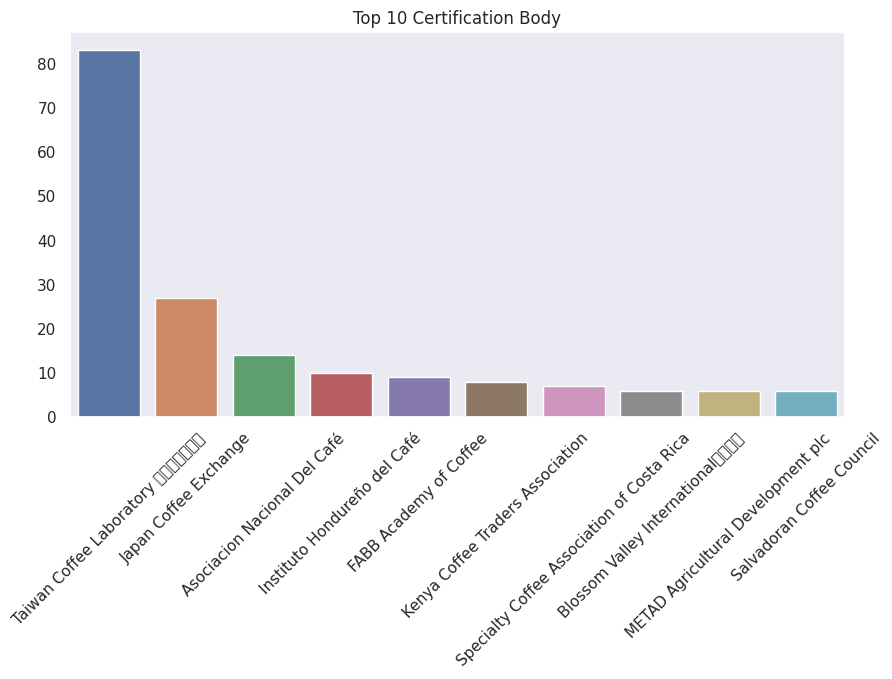

In [19]:
for col in cat_list: 
    plt.figure(figsize=(10,5))
    top10 = df[col].value_counts()[:10]

    # Plot the bar plot
    sns.barplot(x=top10.index, y=top10.values)
    
    # Rotate the x-axis tick labels by 45 degrees
    plt.xticks(rotation=45)
    
    plt.title("Top 10 " + col)
    plt.grid(visible=False)
    plt.show()